# Galactic love

## [Download worked project](../../_static/generated/galactic-love-prj.zip) 

[Browse files online](https://github.com/DavidLeoni/softpython-en/tree/master/projects/galactic-love)

![galactic-love-preview](img/galactic-love-preview.png)


The company Astro Logic provides horoscopes to thousands of loyal customers, who each day require a number of divinitions. The most requested is whether or not they should engage in love affairs with a potential partner, who is chosen according to rigourous criteria like his/her astrological sign. You are then hired to devise a fancy visualization which given two astrological signs and their love compatibility, displays the constellations of their signs close when the the compatibility is high and far away when compatibility is low.

Astrology has been dated to at least the 2nd millennium BCE, and has its roots in calendrical systems used to predict seasonal shifts and to interpret celestial cycles as signs of divine communications. Even if considered a pseudo-science by today standards, it can still provide us with some light-hearted fun while we develop fancy visualizations and matrix manipulations.

## What to do

1. Unzip exercises zip in a folder, you should obtain something like this:

```
galactic-love-prj
    galactic-love.ipynb
    galactic-love-sol.ipynb
    stars.csv
    zodiac.csv
    jupman.py
```

<div class="alert alert-warning">

**WARNING: to correctly visualize the notebook, it MUST be in an unzipped folder !**
</div>

2. open Jupyter Notebook from that folder. Two things should open, first a console and then a browser. The browser should show a file list: navigate the list and open the notebook `galactic-love.ipynb`

3. Go on reading the notebook, and write in the appropriate cells when asked

Shortcut keys:

- to execute Python code inside a Jupyter cell, press `Control + Enter`

- to execute Python code inside a Jupyter cell AND select next cell, press `Shift + Enter`

- to execute Python code inside a Jupyter cell AND a create a new cell aftwerwards, press `Alt + Enter`

- If the notebooks look stuck, try to select `Kernel -> Restart`


## parse_stars

Let's start with real astronomical data. You are given a database of constellations called `stars.csv` (we slightly tweaked it for this occasion - original data source: [Space Telescope Science Institute](https://github.com/mperrin/misc_astro))

In [1]:
import pandas as pd

stars_df = pd.read_csv('stars.csv', encoding='UTF-8')
stars_df[0:32]

,constellation,type,ra,dec,description
0,Andromeda,0,3717,2539,move gamma 1
1,Andromeda,1,2091,2137,draw beta
2,Andromeda,1,1179,1851,draw delta
3,Andromeda,1,251,1745,draw alpha
4,Andromeda,0,1716,1405,move eta
5,Andromeda,1,1420,1456,draw zeta
6,Andromeda,1,1156,1758,draw epsilon
7,Andromeda,1,1179,1851,draw delta
8,Andromeda,1,1106,2023,draw pi
9,Andromeda,1,512,2320,draw theta


You will have to parse it so to obtain a dictionary which maps each constellation to its stars, expressed as a list of lists of points type and coordinates.

Since later we will need to show points in a 2d chart, you will have to transform the coordinates obtained from the data (right ascension and declination in degrees) as follows:

$\large x = \frac{15}{1800}ra$  

$\large y = \frac{dec}{60}$


<div class="alert alert-warning">
    
**You can find the complete output in** [expected_stars_db.py](expected_stars_db.py)
    
</div>    

Excerpt:

```python
{'Andromeda': [   
                  [0, 30.974999999999998, 42.31666666666666],
                  [1, 17.425, 35.61666666666667],
                  [1, 9.825000000000001, 30.849999999999998],
                  [1, 2.091666666666667, 29.083333333333332],
                  [0, 14.3, 23.416666666666668],
                  [1, 11.833333333333332, 24.266666666666666],
                  [1, 9.633333333333333, 29.3],
                  [1, 9.825000000000001, 30.849999999999998],
                  [1, 9.216666666666667, 33.71666666666667],
                  [1, 4.266666666666667, 38.666666666666664],
                  [1, 354.5333333333333, 43.266666666666666],
                  [1, 355.09999999999997, 44.333333333333336],
                  [1, 354.3833333333333, 46.45],
                  [0, 354.5333333333333, 43.266666666666666],
                  [1, 345.475, 42.31666666666666],
                  [0, 9.216666666666667, 33.71666666666667],
                  [1, 17.425, 35.61666666666667],
                  [1, 14.183333333333334, 38.483333333333334],
                  [1, 12.45, 41.06666666666666],
                  [1, 17.375, 47.233333333333334],
                  [1, 24.491666666666667, 48.61666666666667],
                  [-1, 0.0, 0.0]
               ],
 'Antlia':   [
                  [0, 142.30833333333334, -35.95],
                  [2, 156.78333333333333, -31.066666666666666],
                  [2, 164.175, -37.13333333333333],
                  [-1, 0.0, 0.0]
             ],
  .
  .
  .
}
```

In [2]:

import csv

def parse_stars(filename):
    
    
    ret = {}
    with open(filename, encoding='utf-8', newline='') as f:    
        my_reader = csv.reader(f, delimiter=',')
        next(my_reader) # skips header
        constellation = ''
        d = None
        for row in my_reader:
            if row[0] != constellation:
                constellation = row[0]
                stars = []
                ret[constellation] = stars
            coords = [0]* 3
            coords[0] = int(row[1])
            coords[1] = int(row[2]) * (1.0 / 1800) * 15 
            coords[2] = int(row[3]) * (1.0 / 60)
            stars.append(coords)
            
    return ret
    

stars_db = parse_stars('stars.csv')

stars_db['Antlia']
#stars_db['Andromeda']

[[0, 142.30833333333334, -35.95],
 [2, 156.78333333333333, -31.066666666666666],
 [2, 164.175, -37.13333333333333],
 [-1, 0.0, 0.0]]

In [2]:

import csv

def parse_stars(filename):
    raise Exception('TODO IMPLEMENT ME !')

stars_db = parse_stars('stars.csv')

stars_db['Antlia']
#stars_db['Andromeda']

## plot_stars 1


Write a function `plot_stars` to plot constellations.

<div class="alert alert-warning">
    
**WARNING: DO NOT use GraphViz!**
    
Even if we are making plots which look like networks, for these visualizations you just need basic matplotlib (and some creativity ;-)

</div>

<div class="alert alert-warning">
    
**WARNING: for now, ignore the** `new_center` **parameter**   
</div>

A point type can either be:

* `0`: start a new line not connected with the previous one
* `1`: connect previous point with a straight segment
* `2`: connect previous point with a dotted segment (draw it with `linestyle=':'` parameter)
* `-1`: last point, ignore

Available colorschemes are `'M'`, `'F'`, or `'R'` (red)

* to set a black background, set `plt.rcParams['axes.facecolor'] = 'black'`
* draw stars as white dots, setting `markersize=6`
* **to get a nice glowing effect for the lines, draw twice**: once with a thick line and dark color, and once with a thin line with a bright color. You can find the colors in `color_schemes`. To set them in `plt.plot` call, use `linewidth` (sets width in pixels) and `color` parameter, note `color` takes a **single** parameter


**Examples**: 

```python
>>> stars_db['Libra']
[[0, 226.01666666666665, -25.266666666666666],
 [1, 222.71666666666667, -16.03333333333333],
 [1, 229.25, -9.366666666666667],
 [1, 233.875, -14.783333333333333],
 [1, 222.71666666666667, -16.03333333333333],
 [0, 233.875, -14.783333333333333],
 [1, 234.25, -28.133333333333333],
 [1, 234.65833333333333, -29.766666666666666],
 [-1, 0.0, 0.0]]

>>> plot_stars('Libra', 'M', stars_db)  
```

![img/expected-Libra-M-None.png](img/expected-Libra-M-None.png)

```python
>>> stars_db['Cancer']   # has type-2  dotted points
[[0, 131.66666666666669, 28.75],
 [2, 130.8166666666667, 21.466666666666665],
 [2, 131.16666666666666, 18.15],
 [2, 134.61666666666667, 11.85],
 [0, 131.16666666666666, 18.15],
 [2, 124.125, 9.183333333333334],
 [-1, 0.0, 0.0]]

>>> plot_stars("Cancer", 'F', stars_db) 
```
![img/expected-Cancer-F-None.png](img/expected-Cancer-F-None.png)

```python

>>> plot_stars("Cygnus", 'M', stars_db)  # mixed segment types
```
![img/expected-Cygnus-M-None.png](img/expected-Cygnus-M-None.png)

[[0, 226.01666666666665, -25.266666666666666],
 [1, 222.71666666666667, -16.03333333333333],
 [1, 229.25, -9.366666666666667],
 [1, 233.875, -14.783333333333333],
 [1, 222.71666666666667, -16.03333333333333],
 [0, 233.875, -14.783333333333333],
 [1, 234.25, -28.133333333333333],
 [1, 234.65833333333333, -29.766666666666666],
 [-1, 0.0, 0.0]]


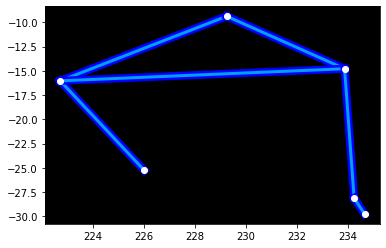

In [3]:

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

color_schemes = {
    'M': ('blue', '#039dfc'),        
    'F': ('purple', 'pink'),    
    'R': ('darkred', 'red')
}
    
def plot_stars(constellation_name, color_scheme, stars, new_center=None):
    

    plt.rcParams['axes.facecolor'] = 'black'    

    color1, color2 = color_schemes[color_scheme]
                
    point_list = stars[constellation_name]
    points = np.asarray(point_list)        
    drawtype = points[:,0]
    ra_degrees = points[:-1,1] 
    dec_degrees = points[:-1,2]
    
    if new_center:
        xbounds = (np.min(ra_degrees), np.max(ra_degrees))
        ybounds = (np.min(dec_degrees), np.max(dec_degrees))
        halfx = (xbounds[1]-xbounds[0])/2
        halfy = (ybounds[1]-ybounds[0])/2

        ra_degrees -= xbounds[0] + halfx - new_center[0]
        dec_degrees -= ybounds[1] - halfy - new_center[1]
    
    for i in range(0, len(drawtype)-1):            
        if drawtype[i] == 0 or drawtype[i] == -1:    
            continue

        xs = ra_degrees[i - 1:(i)+1]
        ys = dec_degrees[i - 1:(i)+1]
        plt.plot(xs,ys, linewidth=8, linestyle=':' if drawtype[i] ==2 else "-", color=color1)
        plt.plot(xs,ys, linewidth=3, linestyle=':' if drawtype[i] ==2 else "-", color=color2)        
        plt.plot(xs, ys, 'o', markersize=6, color='white')
    
    

from pprint import pprint
pprint(stars_db['Libra'])
plot_stars('Libra', 'M', stars_db)  

In [3]:

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

color_schemes = {
    'M': ('blue', '#039dfc'),        
    'F': ('purple', 'pink'),    
    'R': ('darkred', 'red')
}
    
def plot_stars(constellation_name, color_scheme, stars, new_center=None):
    raise Exception('TODO IMPLEMENT ME !')

from pprint import pprint
pprint(stars_db['Libra'])
plot_stars('Libra', 'M', stars_db)  

In [4]:

pprint(stars_db['Cancer'])   # has type-2  dotted points
plot_stars("Cancer", 'F', stars_db)

In [5]:

plot_stars("Cygnus", 'M', stars_db)  # mixed segment types

## plot_stars 2 - new_center

Change the previous function `plot_stars` so it accepts a new argument `new_center`, which is either `None` or a tuple of coordinates where the constellation should be centered: 

* be precise in determining the boundaries of the constellation
* **DO NOT** assume the constallation has a fixed width nor height (so no constants in code!)

**Example 1**: 

```python
fig = plt.figure(figsize=(30,7))
plt.xlim(0,360)
plt.ylim(-40,40)
plot_stars('Gemini', 'F',stars_db, new_center=None)  # no translation
```
![img/expected-Gemini-F-None.png](img/expected-Gemini-F-None.png)

**Example 2**: 

```python
fig = plt.figure(figsize=(30,7))
plt.xlim(0,360)
plt.ylim(-40,40)
plot_stars('Gemini', 'F',stars_db, new_center=(300, -20))  # centered in 300, -20
```
![img/expected-Gemini-F-300--20.png](img/expected-Gemini-F-300--20.png)

## parse_zodiac

You are given a file `zodiac.csv`. For each sign, the table contains astrological information and affinity with other signs, expressed as a relation matrix:

In [8]:
import pandas as pd
df = pd.read_csv('zodiac.csv', encoding='UTF-8')
df[:4]

,Constellation,House,Glyph,Symbol,Dates,Element,Quality,Ruling Planet,Day/Night,Aries,...,Gemini,Cancer,Leo,Virgo,Libra,Scorpius,Sagittarius,Capricornus,Aquarius,Pisces
0,Aries,1,♈︎,Ram,21 March\n-\n20 April,Fire,Cardinal,Mars,Day,NaN,...,4.0,NaN,5.0,NaN,NaN,NaN,5.0,NaN,4.0,NaN
1,Taurus,2,♉︎,Bull,21 April\n-\n21 May,Earth,Fixed,Venus,Night,NaN,...,NaN,4.0,NaN,5.0,NaN,NaN,NaN,5.0,NaN,4.0
2,Gemini,3,♊︎,Twins,22 May\n-\n21 June,Air,Mutable,Mercury,Day,4.0,...,NaN,NaN,4.0,NaN,5.0,NaN,NaN,NaN,5.0,NaN
3,Cancer,4,♋︎,Crab,22 June\n-\n21 July,Water,Cardinal,Moon,Night,NaN,...,NaN,NaN,NaN,4.0,NaN,5.0,NaN,NaN,NaN,5.0


Parse the table so to get a a dictionary of dictionaries, with some selected data:

* affinities are in the scale 1-5, normalize them to floats 0.0-1.0
* dates contain `\n` , normalize them so to have dates separated by a dash as in `21 March-20 April`

**NOTE**: To parse the file, a `csv.reader` is sufficient,  it's not necessary to use pandas - even if data seem to span multiple lines because of the `\n` in dates, note they are bounded by `"` so rows will be correctly parsed by `csv.reader`

<div class="alert alert-warning">
    
**You can find the complete output in** [expected_zodiac_db.py](expected_zodiac_db.py)
    
</div>    

```python
{
 'Aquarius': {
              'affinities': {
                              'Aries': 0.8, 
                              'Gemini': 1.0, 
                              'Libra': 1.0, 
                              'Sagittarius': 0.8
                             },
              'dates': '21 January-18 February',
              'glyph': '♒︎',
              'house': 11
             },
 'Aries':    {
              'affinities': {
                              'Aquarius': 0.8, 
                              'Gemini': 0.8, 
                              'Leo': 1.0, 
                              'Sagittarius': 1.0
                            },
              'dates': '21 March-20 April',
              'glyph': '♈︎',
              'house': 1
             },
  .
  .
  .
}
```

In [9]:
import csv

def parse_zodiac(filename):
    
    with open(filename, encoding='utf-8', newline='') as f:    
        my_reader = csv.reader(f, delimiter=',')
        header = next(my_reader)

        ret = {}
        for row in my_reader:
            workd = {}            
            workd['glyph'] = row[2]
            workd['house'] = int(row[1])
            workd['dates'] = row[4].replace('\n','')
            ret[row[0]] = workd
            workd['affinities'] = {}
            for j in range(9,len(row)):                
                if row[j] != '':
                    workd['affinities'][header[j]] = int(row[j])/5        
        return ret
    
    
zodiac_db = parse_zodiac('zodiac.csv')


from pprint import pprint
#pprint(zodiac_db, width=100)
assert zodiac_db['Aries']['dates'] == '21 March-20 April'
assert zodiac_db['Aries']['affinities'] == {'Aquarius': 0.8, 'Gemini': 0.8, 'Leo': 1.0, 'Sagittarius': 1.0}
assert zodiac_db['Aries']['glyph'] == '♈︎'
assert zodiac_db['Aries']['house'] == 1
assert zodiac_db['Gemini']['dates'] == '22 May-21 June'
assert zodiac_db['Gemini']['affinities'] == {'Aquarius': 1.0, 'Aries': 0.8, 'Leo': 0.8, 'Libra': 1.0}
assert zodiac_db['Gemini']['glyph'] == '♊︎'
assert zodiac_db['Gemini']['house'] == 3
from expected_zodiac_db import expected_zodiac_db
assert zodiac_db == expected_zodiac_db

In [9]:
import csv

def parse_zodiac(filename):
    raise Exception('TODO IMPLEMENT ME !')
    
zodiac_db = parse_zodiac('zodiac.csv')


from pprint import pprint
#pprint(zodiac_db, width=100)
assert zodiac_db['Aries']['dates'] == '21 March-20 April'
assert zodiac_db['Aries']['affinities'] == {'Aquarius': 0.8, 'Gemini': 0.8, 'Leo': 1.0, 'Sagittarius': 1.0}
assert zodiac_db['Aries']['glyph'] == '♈︎'
assert zodiac_db['Aries']['house'] == 1
assert zodiac_db['Gemini']['dates'] == '22 May-21 June'
assert zodiac_db['Gemini']['affinities'] == {'Aquarius': 1.0, 'Aries': 0.8, 'Leo': 0.8, 'Libra': 1.0}
assert zodiac_db['Gemini']['glyph'] == '♊︎'
assert zodiac_db['Gemini']['house'] == 3
from expected_zodiac_db import expected_zodiac_db
assert zodiac_db == expected_zodiac_db

## plot_love

In  `stars.csv` we inserted the special (fake!) constellation of `'Love'`: given the importance, we placed it at the center of the galaxy, positioned at `x=180` degrees and `y=0`. If you try to plot it now, you should get something like this:

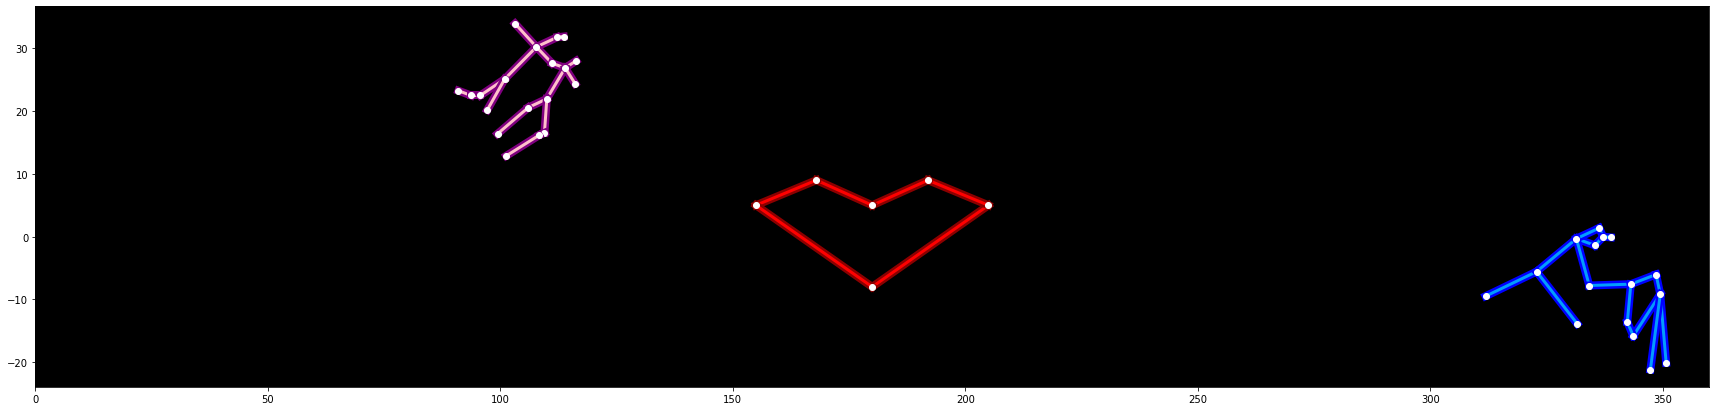

In [10]:
# 'Aries',   'Taurus',   'Gemini',      'Cancer',      'Leo',      'Virgo',
# 'Libra',  'Scorpius',  'Sagittarius', 'Capricornus', 'Aquarius', 'Pisces'

fig = plt.figure(figsize=(30,7))
plt.xlim(0,360)
plot_stars('Gemini','F', stars_db)
plot_stars('Aquarius','M', stars_db)
plot_stars('Love','R', stars_db)    # fake!

Given two astrological signs, place them on the same y=0 axis as the heart and make them symmetrically closer or farther from it according to their astrological affinity, also displaying their name and astrological glyph:

* **REMEMBER** title and xlabels !
* you can reuse previosly defined `plot_stars` function
* constellations x centers should go from 50 to 150 degrees (and symmetrically, from -50 to -150)
* **BUT you will have to display reversed ticks**: 100 50 0 for positive (and symmetrically 0 50 100 for negative)


For drawing text:

* For increasing text size in  `title`, `xticks`, `xlabel`, `text` calls, you can use `fontsize=20` parameter  (for glyphs you will need a bigger number)
* for text inside the chart use use `plt.text(x,y,"some text")`
* the glyph must be drawn bigger than the sign name, so you will need a separate call to `plt.text`

**Examples**:

```python
>>> plot_love('Gemini','Aquarius', stars_db, zodiac_db)  # 1.0 affinity
```

![expected-love-Gemini-Aquarius.png](img/expected-love-Gemini-Aquarius.png)

```python
>>> plot_love('Gemini','Leo', stars_db, zodiac_db)  # 0.8 affinity
```
![expected-love-Gemini-Leo.png](img/expected-love-Gemini-Leo.png)

```python
>>> plot_love('Gemini','Taurus', stars_db, zodiac_db) # 0.0 affinity
```
![expected-love-Gemini-Taurus.png](img/expected-love-Gemini-Taurus.png)

```python
>>> plot_love('Taurus','Capricornus', stars_db, zodiac_db)  # 1.0 affinity
```
![expected-love-Taurus-Capricornus.png](img/expected-love-Taurus-Capricornus.png)

```python
>>> plot_love('Leo','Libra', stars_db, zodiac_db)  # 0.8 affinity
```

![expected-love-Leo-Libra.png](img/expected-love-Leo-Libra.png)

```python
>>> plot_love('Taurus','Scorpius', stars_db, zodiac_db)  # 0.0 affinity
```
![expected-love-Taurus-Scorpius.png](img/expected-love-Taurus-Scorpius.png)

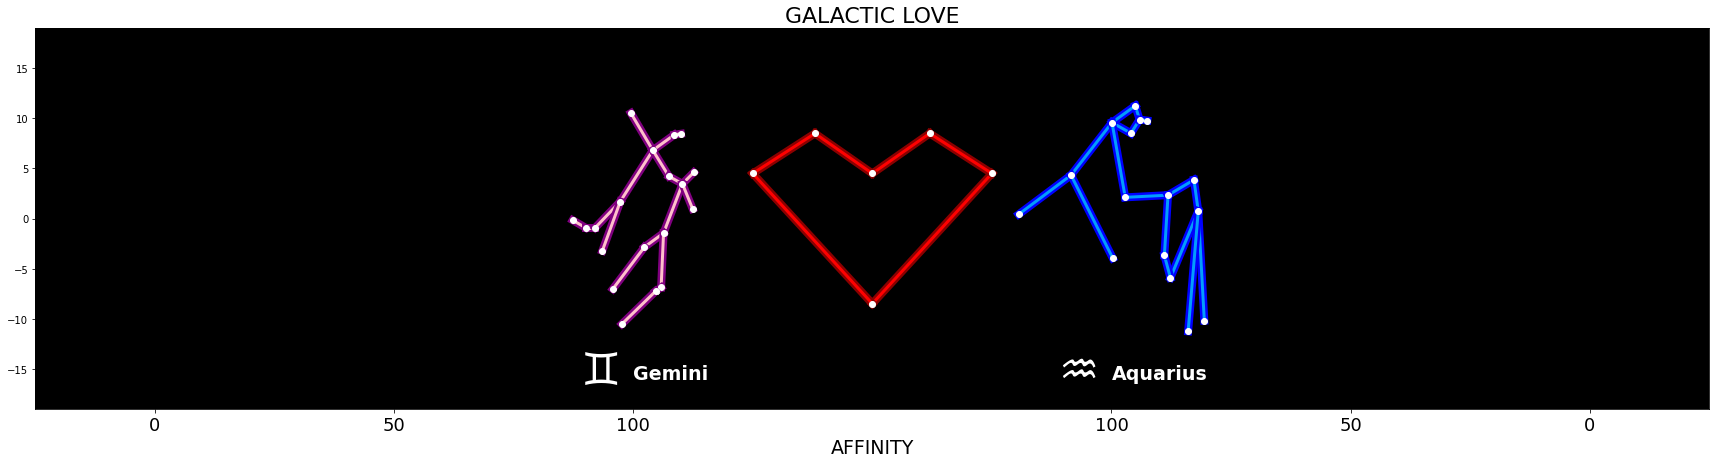

In [11]:


def plot_love(f_sign, m_sign, stars, zodiac):
    
    fig = plt.figure(figsize=(30,7))  # 30 inches large by 7 high
    plt.xlim(-175,175)
    
    
                       
    
    if m_sign in zodiac[f_sign]['affinities']:
        coeff = zodiac[f_sign]['affinities'][m_sign]
    else:
        coeff = 0.0        
    
    plt.title('GALACTIC LOVE', fontsize=22)
    xs = np.array([50,100,150])
    plt.xlabel('AFFINITY', fontsize=19)
    plt.xticks(np.hstack((-xs,xs)), np.hstack((150-np.abs(xs), 150-np.abs(xs))), fontsize=18)    
    plt.ylim(-19,19)
    plot_stars('Love', 'R',stars, new_center=(0,0))
    prox = (1.0 - coeff)*100+25+25
    plot_stars(m_sign, 'M',stars, new_center=(prox,0))
    plot_stars(f_sign, 'F', stars, new_center=(-prox,0))
        
    plt.text(+prox,-16, m_sign,  fontsize=19,  fontweight='bold', color='white')
    plt.text(+prox-11,-16.5, zodiac[m_sign]['glyph'], fontsize=45,  fontweight='bold', color='white')    
    
    plt.text(-prox,-16, f_sign, fontsize=19,  fontweight='bold', color='white')
    plt.text(-prox-11,-16.5, zodiac[f_sign]['glyph'], fontsize=45,  fontweight='bold', color='white')
    
    

plot_love('Gemini','Aquarius', stars_db, zodiac_db)  # 1.0 affinity

In [11]:


def plot_love(f_sign, m_sign, stars, zodiac):
    
    fig = plt.figure(figsize=(30,7))  # 30 inches large by 7 high
    plt.xlim(-175,175)
    
    raise Exception('TODO IMPLEMENT ME !')

plot_love('Gemini','Aquarius', stars_db, zodiac_db)  # 1.0 affinity

In [12]:

plot_love('Gemini','Leo', stars_db, zodiac_db)  # 0.8 affinity

In [13]:

plot_love('Gemini','Taurus', stars_db, zodiac_db) # 0.0 affinity

In [14]:

plot_love('Taurus','Capricornus', stars_db, zodiac_db)  # 1.0 affinity

In [15]:

plot_love('Leo','Libra', stars_db, zodiac_db)  # 0.8 affinity

In [16]:

plot_love('Taurus','Scorpius', stars_db, zodiac_db)  # 0.0 affinity